In [79]:
import numpy as numpy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
from geotext import GeoText
import pycountry

from collections import Counter
from collections import defaultdict

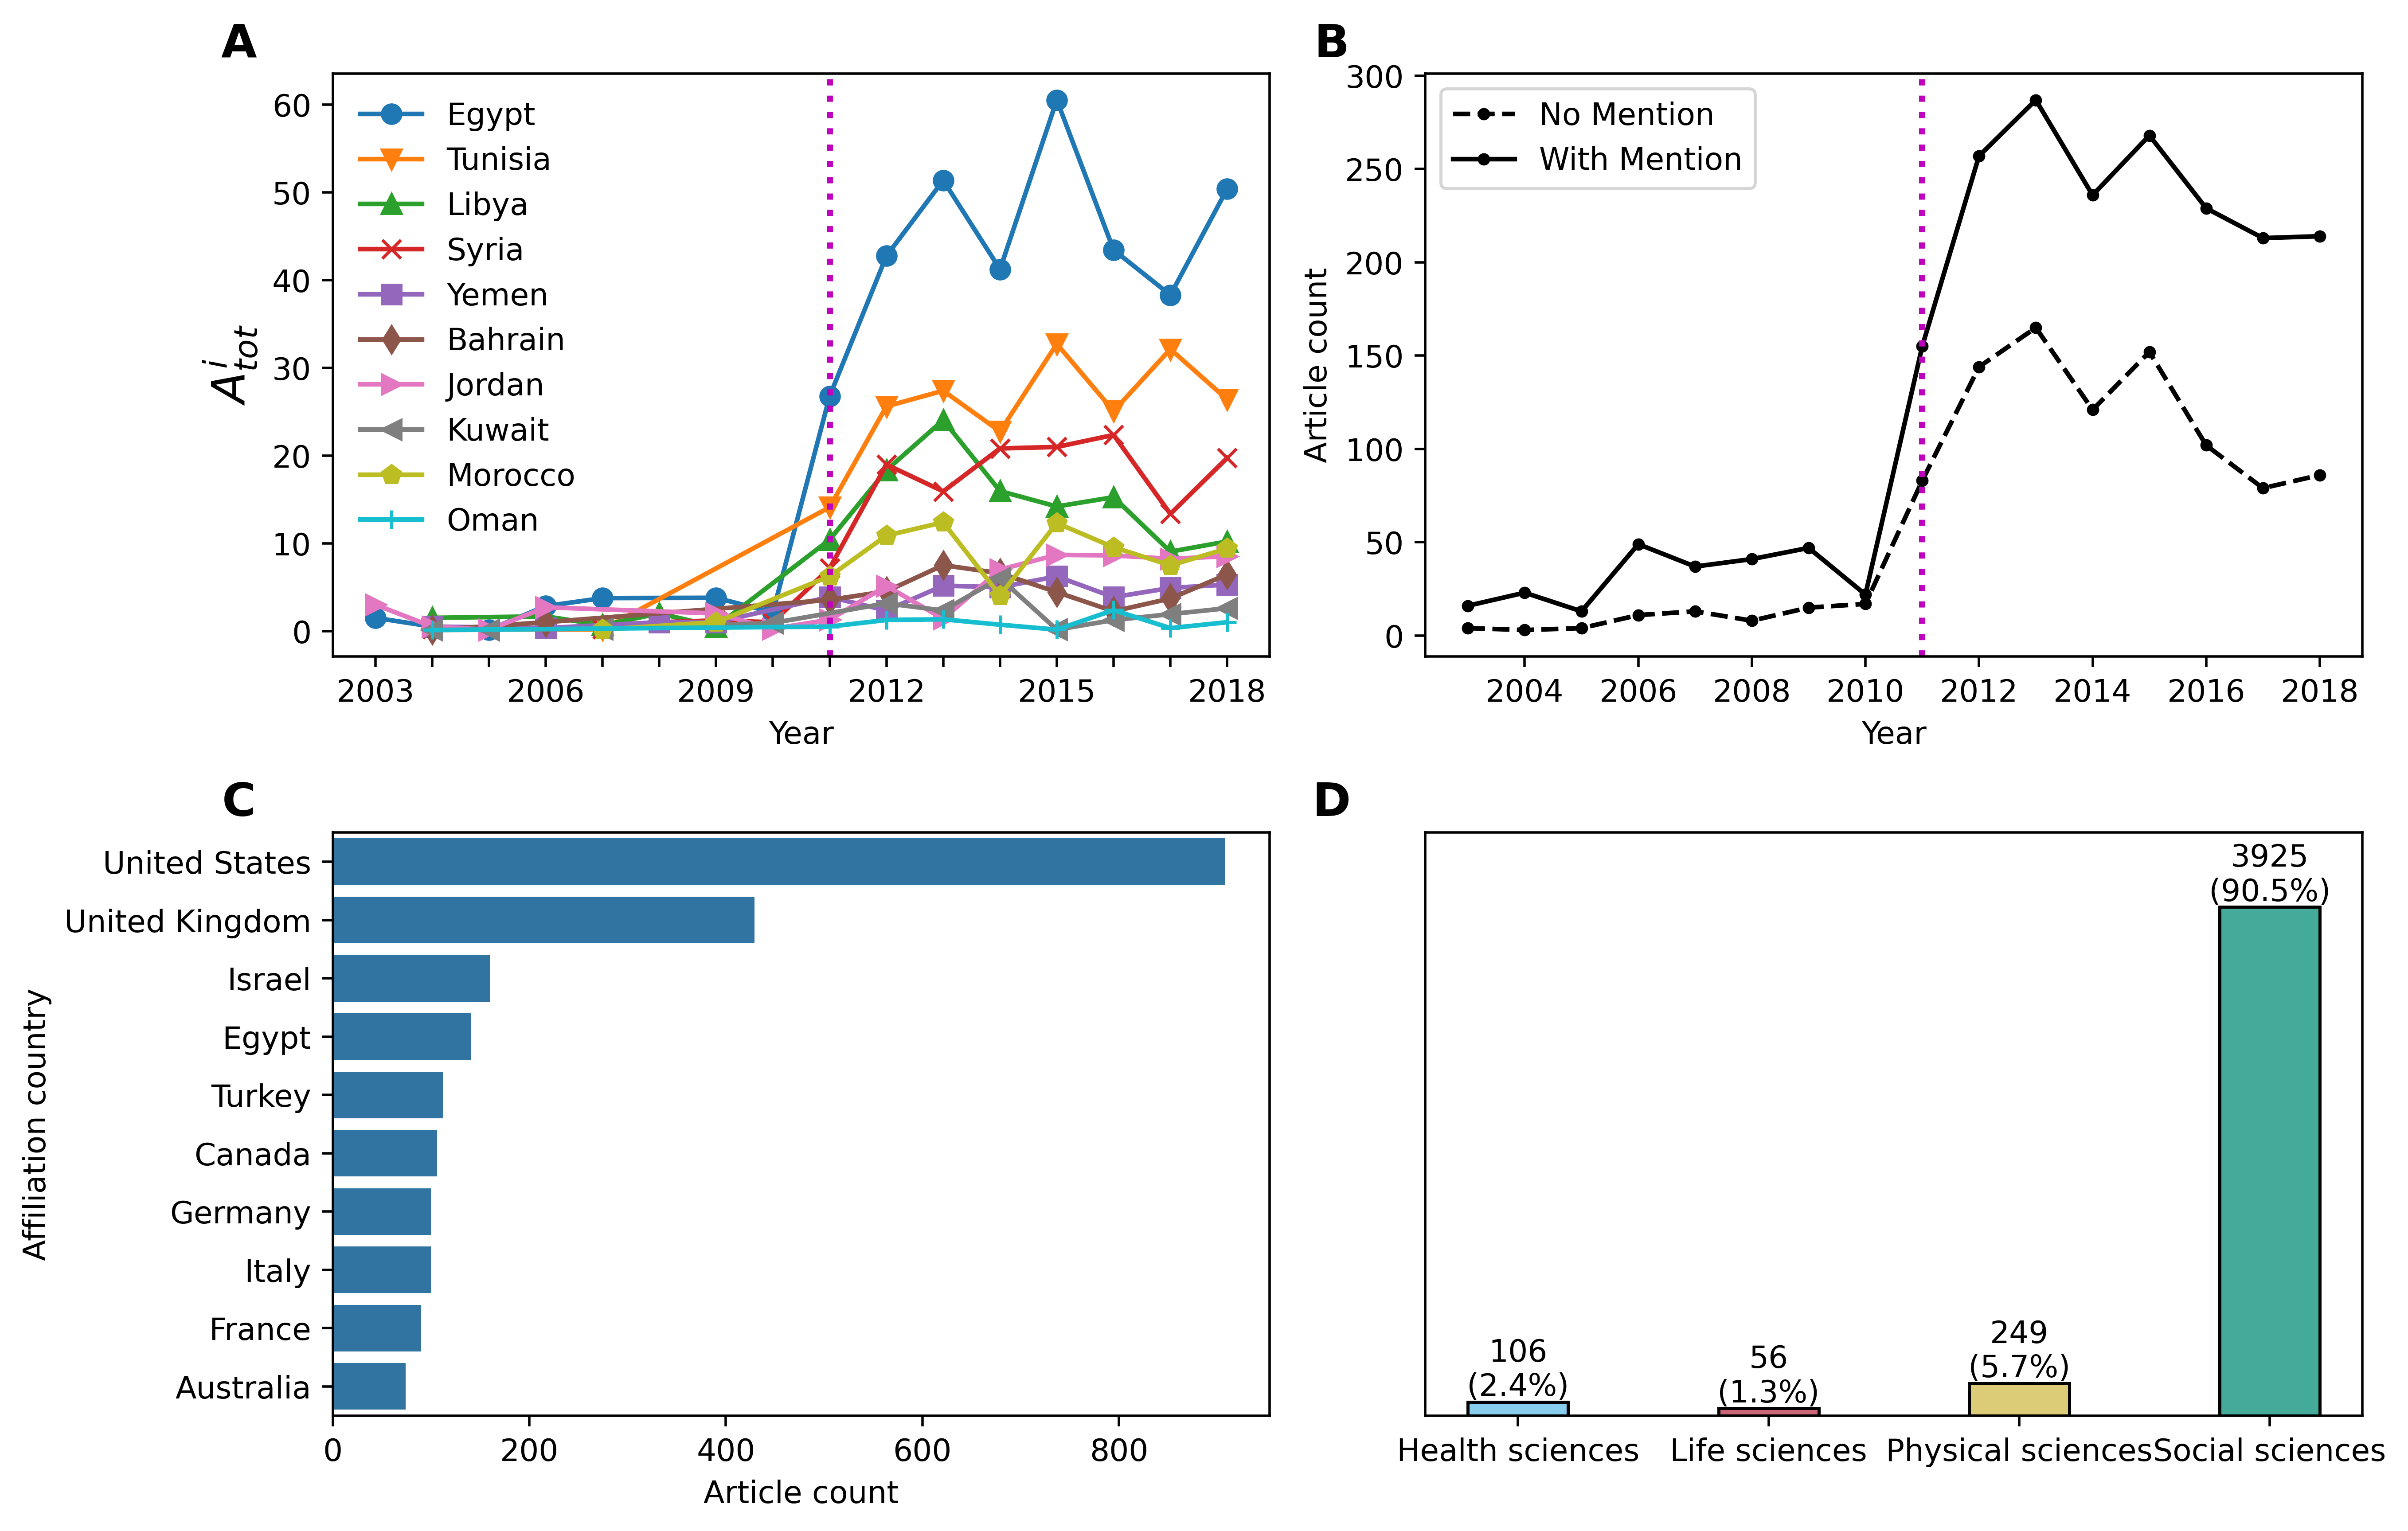

In [144]:
fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(11, 7), dpi=500)
subplot_labels=['A', 'B', 'C', 'D']
ax=ax.flat
for i in range(4):
    ax[i].text(-0.1, 1.05, subplot_labels[i], transform=ax[i].transAxes, fontsize=15, fontweight='bold', va='center', ha='center')
for i, c in enumerate(Country_list.keys()):
    subset=arab_results[arab_results['Country']==c]
    ax[0].plot(subset['Year'], subset['Mentions'],color=custom_colors[i], marker=markers[i], label=c)
ax[0].axvline(2011, color='m', linestyle=':', linewidth=2)
ax[0].legend(loc='upper left', frameon=False)
ax[0].set_xticks(range(2003, 2019))
ax[0].set_xticklabels([str(tick) if year % 3 == 0 else '' for year, tick in enumerate(range(2003, 2019))])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('$A_{tot}^i$', fontsize=15)



df1=pd.read_csv(r"C:\Users\Yasaman\Downloads\Scopus-10-Analyze-Country.csv", skiprows=6).rename(columns={'Unnamed: 1':'count'})
sns.barplot(data=df1[:10], y='COUNTRY/TERRITORY', x='count', ax=ax[2])
ax[2].set_xlabel('Article count')
ax[2].set_ylabel('Affiliation country')


df2=pd.read_csv(r"C:\Users\Yasaman\Downloads\Scopus-10-Analyze-Subject.csv", skiprows=6).rename(columns={'Unnamed: 1':'count'})
df2['subjarea']=df2['SUBJECT AREA'].apply(find_cat)
physical_sciences=[ 'MATH', 'ENGI', 'PHYS', 'COMP','MULT']
df2=df2[~(df2['subjarea'].isin(physical_sciences))]
df2=df2.groupby('subjarea')['count'].sum().reset_index()
total = sum(df2['count'])

shares= [value / total * 100 for value in df2['count']]
bars = ax[3].bar([0, 2, 4, 6], df2['count'], color= ['#88CCEE', '#CC6677', '#DDCC77', '#44AA99'],edgecolor='k')

# Annotate bars with numbers and shares
for i, bar in enumerate(bars):
    height = bar.get_height().round(1)
    
    # Number and share for 'before' bars
    ax[3].text(bar.get_x() + bar.get_width() / 2.0, height, 
            f'{height}\n({shares[i]:.1f}%)', ha='center', va='bottom')
ax[3].set_xticks([0, 2, 4, 6], ['Health sciences', 'Life sciences', 'Physical sciences', 'Social sciences'], )
ax[3].set_ylim(0,4500)
ax[3].set_yticks([])


mention_no_mention=df.groupby(['Year', 'is_mentioned'])['Title'].count().reset_index()
for is_men in [False, True]:
    if is_men:
        label='With Mention'
        style='-'
    else:
        label='No Mention'
        style='--'
    subset=mention_no_mention[mention_no_mention['is_mentioned']==is_men]
    ax[1].plot(subset['Year'], subset['Title'], label=label, marker='.', color='k', linestyle=style)
ax[1].axvline(2011, color='m', linestyle=':', linewidth=2)

ax[1].legend()
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Article count')

fig.tight_layout()

In [123]:
df

,Title,Year,Source title,Link,Abstract,Text,Mentions,Mentioned_country_size,is_mentioned
0,Educate. Empower. Revolt: Framing citizen jour...,2018,Journalism Practice,https://www.scopus.com/inward/record.uri?eid=2...,This analysis examines how citizen journalism ...,Educate. Empower. Revolt: Framing citizen jour...,[ind],1,True
1,Rethinking the Tunisian miracle: a party polit...,2018,Democratization,https://www.scopus.com/inward/record.uri?eid=2...,"Five years on from the Tunisian revolution, Tu...",Rethinking the Tunisian miracle: a party polit...,[tun],1,True
2,Giving voice to the voiceless: vulnerable refu...,2018,"Journal of Policing, Intelligence and Counter ...",https://www.scopus.com/inward/record.uri?eid=2...,"Seven years on, Syria’s Arab Spring has mutate...",Giving voice to the voiceless: vulnerable refu...,"[lbn, syr]",2,True
3,Googling Investor’s Sentiment: Powerful Measur...,2018,International Economic Journal,https://www.scopus.com/inward/record.uri?eid=2...,The objective of this paper is to investigate ...,Googling Investor’s Sentiment: Powerful Measur...,[],0,False
4,Kin-Work in a time of jihad: Sustaining Bonds ...,2018,Cultural Anthropology,https://www.scopus.com/inward/record.uri?eid=2...,"In this article, I examine the politics of kin...",Kin-Work in a time of jihad: Sustaining Bonds ...,[tun],1,True
...,...,...,...,...,...,...,...,...,...
3109,"The ""street"" and the politics of dissent in th...",2003,Middle East Report,https://www.scopus.com/inward/record.uri?eid=2...,The growing tendency of most Arab governments ...,"The ""street"" and the politics of dissent in th...",[],0,False
3110,Liberating songs: Palestine put to music,2003,Journal of Palestine Studies,https://www.scopus.com/inward/record.uri?eid=2...,This article survey the history of songs about...,Liberating songs: Palestine put to music This ...,"[egy, pse]",2,True
3111,"Local struggle, nationals struggle: Palestinia...",2003,International Journal of Middle East Studies,https://www.scopus.com/inward/record.uri?eid=2...,The massacre in Kafr Qasim took place at the h...,"Local struggle, nationals struggle: Palestinia...",[isr],1,True
3112,More than a mob: The dynamics of political dem...,2003,Middle East Report,https://www.scopus.com/inward/record.uri?eid=2...,"Jordan, which experimented with a cautious dem...",More than a mob: The dynamics of political dem...,[jor],1,True


In [34]:
def find_cat(subject):
    subject=subject[:4].upper()
    social_sciences=['PSYC', 'SOCI', 'DECI', 'ARTS', 'ECON', 'BUSI']
    health_sciences=['MEDI', 'NURS', 'DENT', 'HEAL', 'VETE']
    physical_sciences=['CHEM', 'EART', 'ENER', 'CENG',  'ENVI','MATE']
    life_sciences=['PHAR', 'NEUR', 'AGRI', 'IMMU', 'BIOC']
    if subject in social_sciences:
        return 'Social sciences'
    elif  subject in health_sciences:
        return 'Health sciences'
    elif subject in physical_sciences:
        return 'Physical sciences'
    elif subject in life_sciences:
        return 'Life sciences'
    else:
        return subject

In [77]:

df=pd.read_csv(r"C:\Users\Yasaman\Downloads\scopus_arabspring.csv")
df['Text']=df['Title']+' '+df['Abstract']
df['Mentions']=df['Text'].apply(get_country)

In [93]:
df['Mentioned_country_size']=df['Mentions'].apply(lambda x: len(x))
result = fractional_count_mentions_per_year(df)
arabspring_countries=['egy', 'tun', 'lby', 'syr', 'mar', 'kwt', 'bhr', 'yem', 'omn', 'jor']
arab_results=result[result.Country.isin(arabspring_countries)]
Country_list = {'Egypt':'EGY', 'Tunisia':'TUN', 'Libya':'LBY', 'Syria':'SYR', 'Yemen':'YEM',
                    'Bahrain':'BHR', 'Jordan':'JOR', 'Kuwait':'KWT', 'Morocco':'MAR', 'Oman':'OMN'}
rev_Country_list = {Country_list[key].lower(): key for key in Country_list}
country_names = list(Country_list.keys())
custom_colors = [f'C{i}' for i in range(10)]

markers=['o', 'v', '^', 'x', 's', 'd', '>', '<', 'p', '+']

In [96]:
arab_results['Country']=arab_results['Country'].map(rev_Country_list)

C:\Users\Yasaman\AppData\Local\Temp\ipykernel_39272\289860716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arab_results['Country']=arab_results['Country'].map(rev_Country_list)


In [114]:
df['is_mentioned']=df['Mentioned_country_size']>0

In [119]:
mention_no_mention=df.groupby(['Year', 'is_mentioned'])['Title'].count().reset_index()

In [75]:

def fractional_count_mentions_per_year(df):
    """
    Counts how many times each country is mentioned per year using fractional counting.

    Args:
        df (pd.DataFrame): DataFrame with 'Mentions' (list of countries) and 'Year' columns.

    Returns:
        pd.DataFrame: A DataFrame with each country, year, and their fractional mention counts.
    """
    mentions_by_year = defaultdict(float)

    # Iterate over rows to calculate fractional mentions by year
    for _, row in df.iterrows():
        year = row['Year']
        mentions = row['Mentions']
        weight = 1 / len(mentions) if mentions else 0  # Calculate fractional weight

        for country in mentions:
            mentions_by_year[(year, country)] += weight

    # Convert to DataFrame
    mention_counts_df = pd.DataFrame(
        [{'Year': year, 'Country': country, 'Mentions': count} 
         for (year, country), count in mentions_by_year.items()]
    )

    return mention_counts_df.sort_values(by=['Year', 'Country']).reset_index(drop=True)


In [65]:
df_country_list_different_spellings=pd.read_excel(r"C:\Users\Yasaman\Downloads\country_list_different_spellings_arabspring.xlsx")
df_country_list_different_spellings['ulke']=df_country_list_different_spellings['ulke'].apply(lambda x: x.lower())
map_country_list_different_spellings = pd.Series( df_country_list_different_spellings.ulke.values, index=df_country_list_different_spellings.yer).to_dict()
map_country_list_different_spellings['Turkey']='tur'

In [67]:
def get_country(txt):


    for copyright_mark in ['©', 'Copyright (C)']:
        if copyright_mark in txt:
            txt = txt.split(copyright_mark)[0]

    for tag in [ 'US dollar','New Mexico','Turkish','US$','US $','United States Dollar','USD','HK', 'Congo Red',
               'Congo red', 'US-Dollar', 'Michael Jordan','Guinea pig']:
        if tag in txt:
            txt=txt.replace(tag, '')

    places = GeoText(txt)
    country_codes = set()  # To store unique country codes.

    # Attempt to get country codes directly from GeoText results.
    for country_name in set(places.countries):
        country_code = pycountry.countries.get(name=country_name)
        if country_code:
            country_codes.add(country_code.alpha_3.lower())
        else:
            # Directly add to undefined list if not found.
            country_codes.add(map_country_list_different_spellings.get(country_name, country_name))

    pattern = r'\b(' + '|'.join(re.escape(country_name) for country_name in map_country_list_different_spellings.keys()) + r')\b'

    # Find all occurrences of country names in the text, considering word boundaries.
    matches = re.findall(pattern, txt)

    # For each matched country name, add its corresponding country code to the set.
    for match in matches:
        country_codes.add(map_country_list_different_spellings[match])


    # Handle special case for 'uae'.
    if 'uae' in country_codes:
        country_codes.remove('uae')
        country_codes.add('are')

    return list(country_codes)
